In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import cv2 as cv

def box_kernel(image, size=3):
    kernel = np.ones((size, size))
    kernel = kernel / kernel.sum()
    output = cv.filter2D(image, ddepth=-1, kernel=kernel)
    return output

def gaussian_kernel(image, K, var, size=9):
    kernel = np.zeros((size, size))
    center = size // 2
    for s in range(size):
        for r in range(size):
            i, j = s - center, r - center
            kernel[s, r] = K * np.exp(-1 * (i**2 + j**2) / (2 * var))
    kernel = kernel / kernel.sum()
    output = cv.filter2D(image, ddepth=-1, kernel=kernel)
    return output

def median_kernel(image, k=3):
    output = np.zeros_like(image)
    pad = k // 2
    image = cv.copyMakeBorder(image, top=pad, bottom=pad, left=pad, right=pad,
                               borderType=cv.BORDER_CONSTANT, value=0)
    m, n = image.shape
    for i in range(m - k):
        for j in range(n - k):
            subimg = image[i:i + 3, j:j + 3].flatten()
            output[i, j] = np.median(subimg)
    return output


In [5]:
import numpy as np
import cv2 as cv

def sobel_kernel_v(image):
    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    kernel = cv.flip(kernel, -1)
    output = cv.filter2D(image, -1, kernel)
    return output


In [6]:
import numpy as np
import cv2 as cv

def sobel_kernel_h(image):
    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    kernel = kernel.T
    kernel = cv.flip(kernel, -1)
    output = cv.filter2D(image, -1, kernel)
    return output

def laplacian_kernel(image):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    output = cv.filter2D(image, ddepth=-1, kernel=kernel)
    return output


Q1

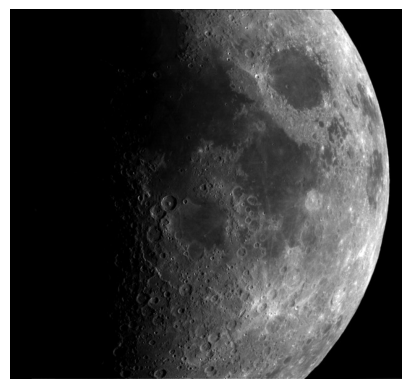

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

moon = cv.imread('moon.jpg')
moon = cv.cvtColor(moon, cv.COLOR_BGR2GRAY)

plt.imshow(moon, cmap='gray')
plt.axis('off')
plt.show()


In [9]:
moon_box = box_kernel(moon, 9)
moon_gauss = gaussian_kernel(moon, 1, 1, 9) 
moon_laplace = laplacian_kernel(moon)

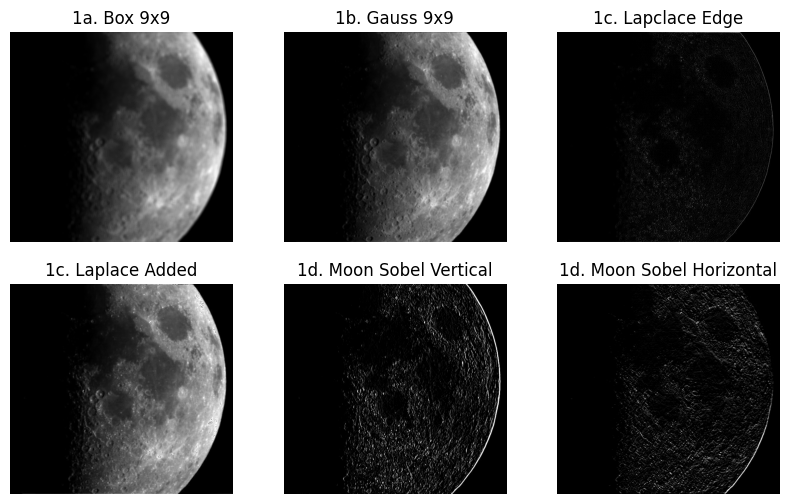

In [10]:
moon_laplace_added = moon + moon_laplace
moon_sobel_v = sobel_kernel_v(moon)
moon_sobel_h = sobel_kernel_h(moon)

fig = plt.figure(figsize=(10,6))

images = [moon_box, moon_gauss, moon_laplace, moon_laplace_added, moon_sobel_v, moon_sobel_h]
titles = ['1a. Box 9x9', '1b. Gauss 9x9', '1c. Lapclace Edge', '1c. Laplace Added', '1d. Moon Sobel Vertical', '1d. Moon Sobel Horizontal']

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


Q2

In [12]:
import numpy as np

def create_mask(i=50, j=50):
    output = np.zeros((100, 100))
    output[50 - i // 2:50 + i // 2, 50 - j // 2:50 + j // 2] = 1
    return output


In [14]:
mask = create_mask(20,20) 
mask2 = create_mask(50,50)


In [16]:
dft = cv.dft(np.float32(mask), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum, phase_spectrum = cv.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = 20 * np.log(1 + magnitude_spectrum)
power_spectrum = np.power(magnitude_spectrum, 2)


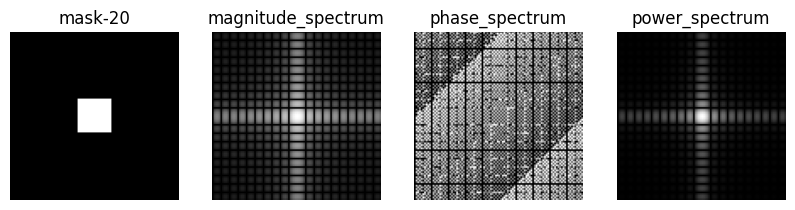

In [17]:
fig = plt.figure(figsize=(10,10))
images = [mask, magnitude_spectrum, phase_spectrum, power_spectrum]
titles = ['mask-20', 'magnitude_spectrum', 'phase_spectrum', 'power_spectrum']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


2b

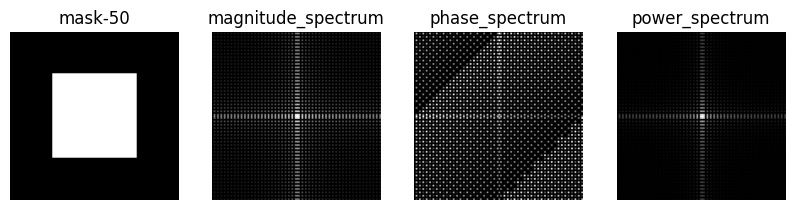

In [18]:
dft = cv.dft(np.float32(mask2), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum, phase_spectrum = cv.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])
magnitude_spectrum = 20 * np.log(1 + magnitude_spectrum)
power_spectrum = np.power(magnitude_spectrum, 2)

fig = plt.figure(figsize=(10, 10))
images = [mask2, magnitude_spectrum, phase_spectrum, power_spectrum]
titles = ['mask-50', 'magnitude_spectrum', 'phase_spectrum', 'power_spectrum']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


Q3

In [19]:
import numpy as np

stripes = np.zeros((100, 100))
t = 0

for i in range(len(stripes)):
    if t % (2 * 2) < 2:
        stripes[i] = 255 * np.ones(100)
    t += 1

stripes = stripes.T


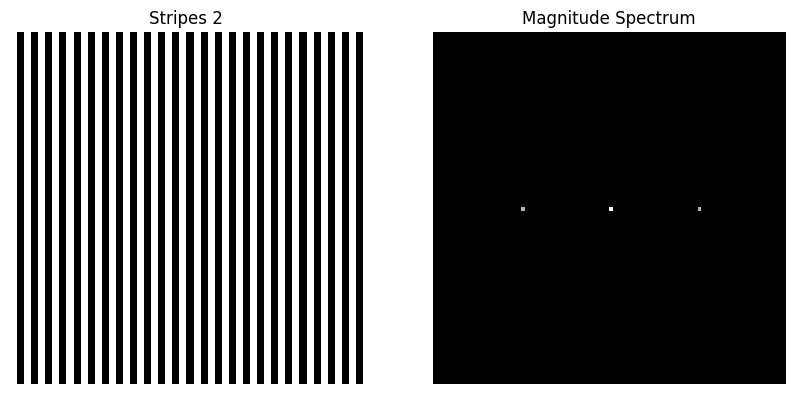

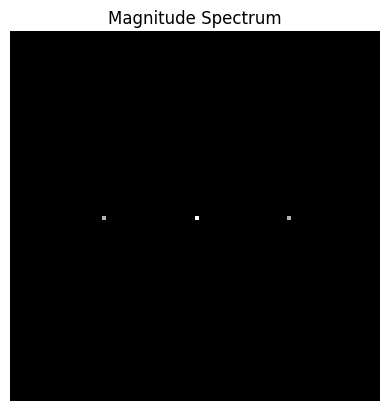

In [20]:
magnitude_spectrum2 = np.abs(np.fft.fftshift(np.fft.fft2(stripes)))

fig = plt.figure(figsize=(10, 10))
images = [stripes, magnitude_spectrum2]
titles = ['Stripes 2', 'Magnitude Spectrum']

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()

plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


In [21]:
import numpy as np

stripes2 = np.zeros((100, 100))
t = 0

for i in range(len(stripes2)):
    if t % (2 * 4) < 4:
        stripes2[i] = 255 * np.ones(100)
    t += 1

stripes2 = stripes2.T


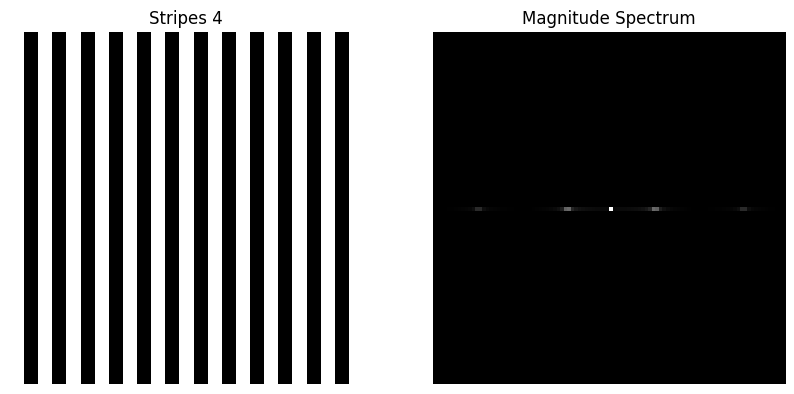

In [22]:
magnitude_spectrum3 = np.abs(np.fft.fftshift(np.fft.fft2(stripes2)))

fig = plt.figure(figsize=(10, 10))
images = [stripes2, magnitude_spectrum3]
titles = ['Stripes 4', 'Magnitude Spectrum']

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


In [24]:
import numpy as np

stripes3 = np.zeros((100, 100))
t = 0

for i in range(len(stripes3)):
    if t % 2 < 1:
        stripes3[i] = 255 * np.ones(100)
    t += 1

stripes3 = stripes3.T


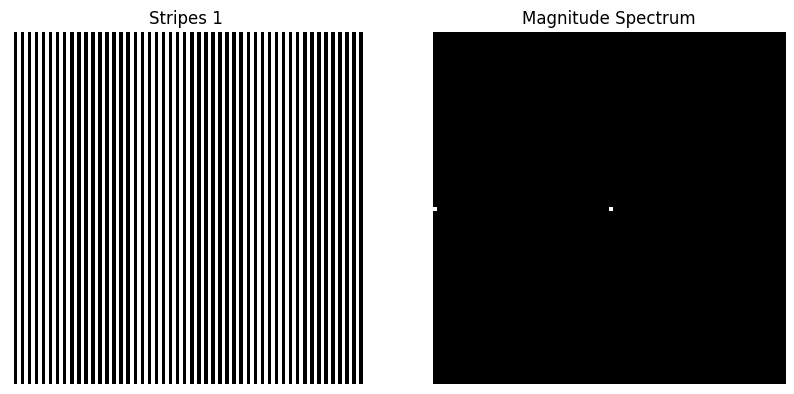

In [25]:
magnitude_spectrum4 = np.abs(np.fft.fftshift(np.fft.fft2(stripes3)))

fig = plt.figure(figsize=(10,10))
images = [stripes3, magnitude_spectrum4]
titles = ['Stripes 1', 'Magnitude Spectrum']

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


Q4


In [26]:
rice = cv.imread('ricegrains.jpg')
rice = cv.cvtColor(rice, cv.COLOR_BGR2GRAY)

4a

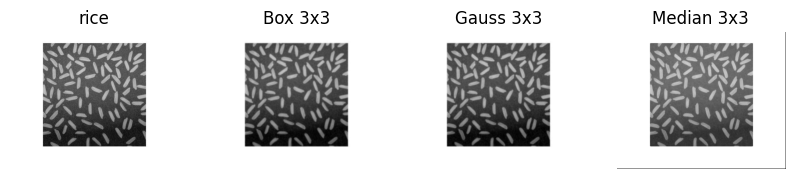

In [27]:
box3, gauss3, median3 = box_kernel(rice, 3), gaussian_kernel(rice, 1, 1.5, 3), median_kernel(rice, 3)

fig = plt.figure(figsize=(10, 10))
images = [rice, box3, gauss3, median3]
titles = ['rice', 'Box 3x3', 'Gauss 3x3', 'Median 3x3']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


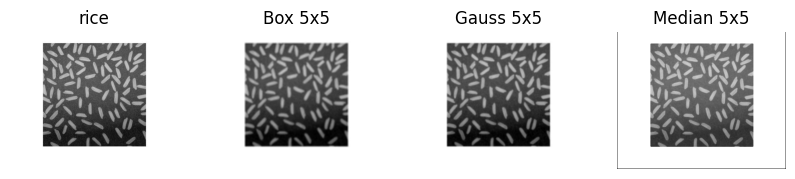

In [28]:
box5, gauss5, median5 = box_kernel(rice, 5), gaussian_kernel(rice, 1, 1.5, 5), median_kernel(rice, 5)

fig = plt.figure(figsize=(10, 10))
images = [rice, box5, gauss5, median5]
titles = ['rice', 'Box 5x5', 'Gauss 5x5', 'Median 5x5']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


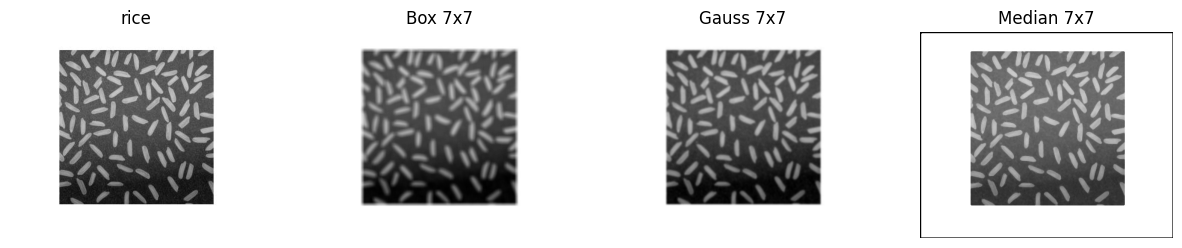

In [29]:
box7, gauss7, median7 = box_kernel(rice, 7), gaussian_kernel(rice, 1, 1.5, 7), median_kernel(rice, 7)

fig = plt.figure(figsize=(15, 15))
images = [rice, box7, gauss7, median7]
titles = ['rice', 'Box 7x7', 'Gauss 7x7', 'Median 7x7']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


4b

In [30]:
import numpy as np

def apply_gaussian_filter(image, filter_radius, high_pass=False):
    f_transformed = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transformed)
    rows, cols = image.shape
    filtered_output = np.zeros((rows, cols))
    center_x = round(rows / 2)
    center_y = round(cols / 2)
    frequency_filter = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            distance = (i - center_x) ** 2 + (j - center_y) ** 2
            frequency_filter[i, j] = np.exp(-(distance / (2 * (filter_radius ** 2))))

    if high_pass:
        frequency_filter = 1 - frequency_filter

    filtered_fourier = f_shifted * frequency_filter
    filtered_image = np.abs(np.fft.ifft2(filtered_fourier))
    filtered_image = filtered_image.astype(np.uint8)
    
    return filtered_image


In [31]:
import numpy as np

def apply_butterworth_filter(image, filter_radius, order, high_pass=False):
    f_transformed = np.fft.fft2(image)
    f_shifted = np.fft.fftshift(f_transformed)
    rows, cols = image.shape
    filtered_image = np.zeros((rows, cols))
    center_x = round(rows / 2)
    center_y = round(cols / 2)
    frequency_filter = np.zeros((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_x) ** 2 + (j - center_y) ** 2)
            frequency_filter[i, j] = 1 / (1 + ((distance / filter_radius) ** (2 * order)))

    if high_pass:
        frequency_filter = 1 - frequency_filter

    filtered_fourier = f_shifted * frequency_filter
    filtered_image = np.abs(np.fft.ifft2(filtered_fourier))
    
    return filtered_image


In [32]:
g = apply_gaussian_filter(rice,10,high_pass = True)
b = apply_butterworth_filter(rice,20,5,high_pass = True)

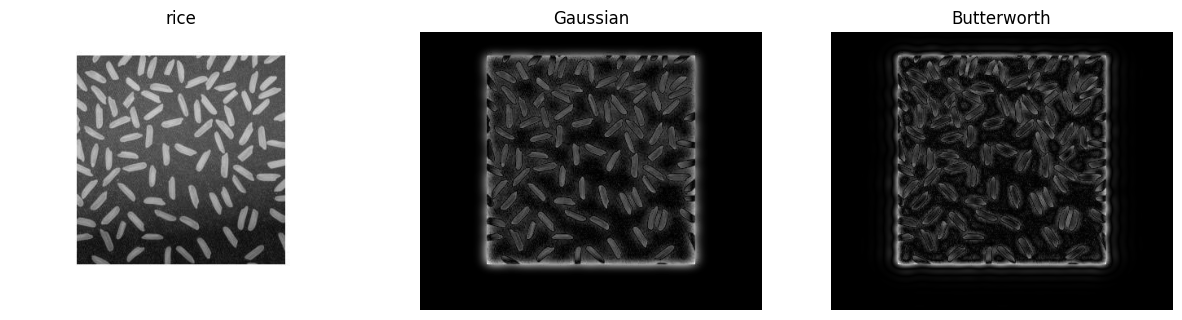

In [33]:
fig = plt.figure(figsize=(15, 15))
images = [rice, g, b]
titles = ['rice', 'Gaussian', 'Butterworth']

for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


Q5

a

In [34]:
def unsharpen(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    # kernel = cv2.flip(kernel, -1)
    output = cv.filter2D(img, -1, kernel)
    return output


In [35]:
rbcs = cv.imread('RBCs.bmp')
rbcs = cv.cvtColor(rbcs, cv.COLOR_BGR2GRAY)

In [37]:
unsharp_rbcs = unsharpen(rbcs) 
sobel_rbcs_v = sobel_kernel_v(rbcs) 
sobel_rbcs_h = sobel_kernel_h(rbcs) 
laplace_rbcs = laplacian_kernel(rbcs)

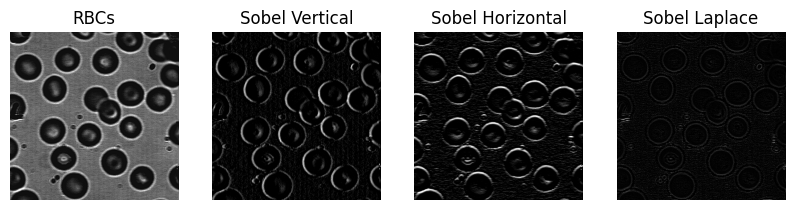

In [38]:
fig = plt.figure(figsize=(10, 10))
images = [unsharp_rbcs, sobel_rbcs_v, sobel_rbcs_h, laplace_rbcs]
titles = ['RBCs', 'Sobel Vertical', 'Sobel Horizontal', 'Sobel Laplace']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


5(b)

In [40]:
rbcs_gauss_filter = apply_gaussian_filter(rbcs,10,high_pass = True) 
rbcs_butter_filter = apply_butterworth_filter(rbcs,20,5,high_pass = True)

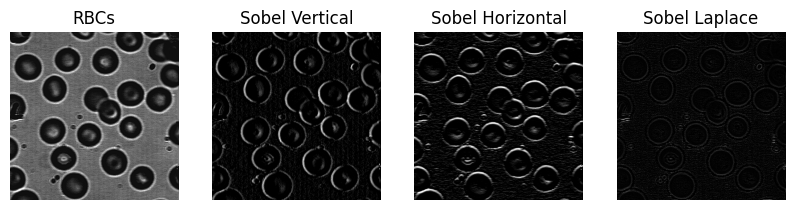

In [41]:
fig = plt.figure(figsize=(10, 10))
images = [unsharp_rbcs, sobel_rbcs_v, sobel_rbcs_h, laplace_rbcs]
titles = ['RBCs', 'Sobel Vertical', 'Sobel Horizontal', 'Sobel Laplace']

for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


In [42]:
import timeit
cm = cv.imread('cameraman.jpg', 0)

In [43]:
box_cm = box_kernel(cm,7)

In [46]:
def padding(img, V, H):
    img = cv.copyMakeBorder(img.copy(), V // 2, V // 2, H // 2, H // 2, cv.BORDER_CONSTANT)
    return img


Padding

In [47]:
padded_cm = padding(cm, 40, 40)

padded_kernel = np.ones((7, 7)) / 49
padded_kernel = padding(padded_kernel, padded_cm.shape[0] - 7, padded_cm.shape[1] - 7)


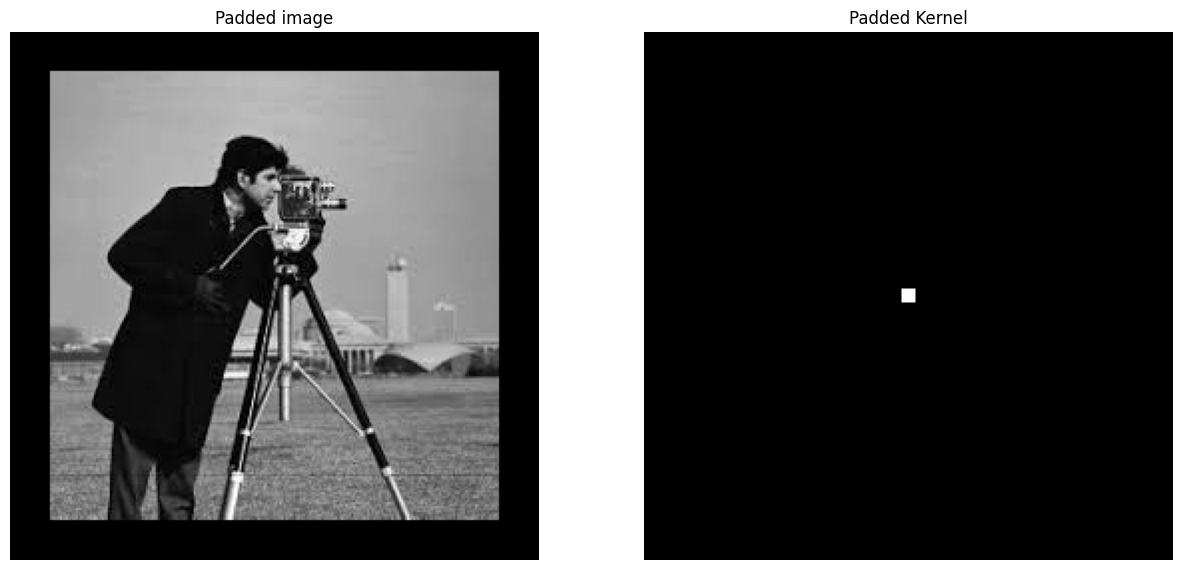

In [48]:
fig = plt.figure(figsize=(15, 15))
images = [padded_cm, padded_kernel]
titles = ['Padded image', 'Padded Kernel']

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.imshow(images[i-1], cmap='gray')
    plt.title(titles[i-1])
    plt.axis('off')

plt.show()


Fast fourier transforms of the image and kernel

In [50]:
padded_cm_fft = np.fft.fft2(padded_cm) 
padded_kernel_fft = np.fft.fft2(padded_kernel)

Multiplying

In [51]:
mult = padded_cm_fft*padded_kernel_fft

Inverse Transform 

In [52]:
inv = np.fft.ifft2(mult).real

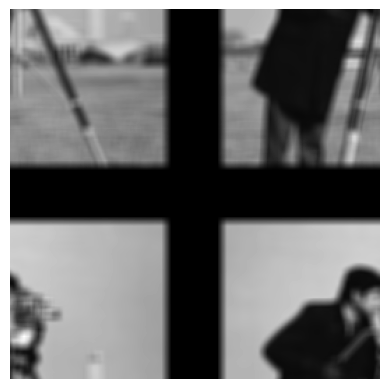

In [60]:
plt.imshow(inv, cmap='gray')
plt.axis('off') 
plt.show()

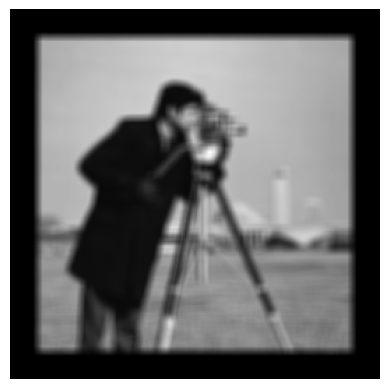

In [62]:
# Determine the midpoints for splitting the image
mid_row = inv.shape[0] // 2
mid_col = inv.shape[1] // 2

# Split the image into quadrants
top_left = inv[:mid_row, :mid_col]
top_right = inv[:mid_row, mid_col:]
bottom_left = inv[mid_row:, :mid_col]
bottom_right = inv[mid_row:, mid_col:]

# Rearrange the quadrants
rearr = np.vstack([np.hstack([bottom_right, bottom_left]),
                   np.hstack([top_right, top_left])])

# Plot the rearranged image
plt.imshow(rearr, cmap='gray')
plt.axis('off')
plt.show()


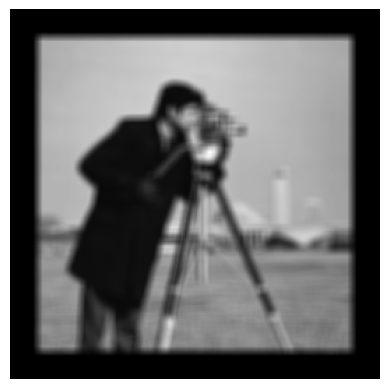

In [64]:
plt.imshow(rearr, cmap='gray') 
plt.axis('off')
plt.show()

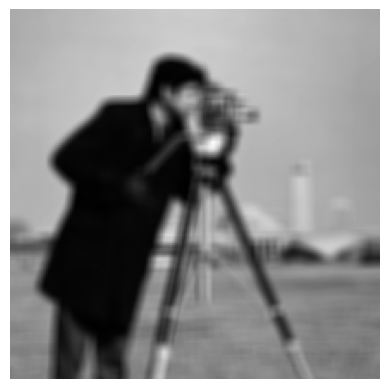

In [66]:
c = 25
cropped = rearr[c:-c, c:-c]
plt.imshow(cropped, cmap='gray') 
plt.axis('off')
plt.show()

In [72]:
%%time
padded_cm = padding(cm,40,40)
padded_kernel = np.ones((7,7))/49
padded_kernel = padding(padded_kernel,padded_cm.shape[0]-7,padded_cm.shape[1]-7)
padded_cm_fft = np.fft.fft2(padded_cm) 
padded_kernel_fft = np.fft.fft2(padded_kernel)
mult = padded_cm_fft*padded_kernel_fft
inv = np.fft.ifft2(mult).real
cropped = rearr[c:-c, c:-c]

CPU times: user 6.43 ms, sys: 1.38 ms, total: 7.81 ms
Wall time: 6.9 ms


Average filtering has a wall time of 6.9 ms while the fft method has a wall time of 7.8ms, which is almost the same